In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv("data.csv")
data

,kg,price
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,90
9,10,100


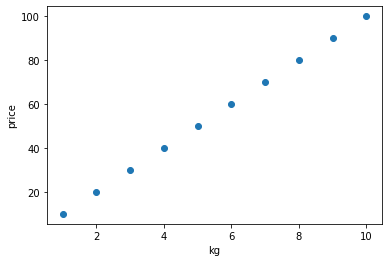

In [3]:
plt.xlabel("kg")
plt.ylabel("price")
plt.scatter(data.kg,data.price)

In [4]:
X=data[['kg']]
y=data['price']
X

,kg
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# Using Sklearn Regression model

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,kg
3,4
5,6
1,2
4,5
9,10
8,9
0,1
2,3


In [7]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.score(X_test,y_test)

1.0

In [8]:
model.predict([[10]])

array([100.])

# Using Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation


In [18]:
model_nn=Sequential()
model_nn.add(Dense(1,input_shape=[1],activation="linear"))


In [11]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_nn.compile(optimizer='sgd',loss='mean_squared_error')
model_nn.fit(X_train,y_train,epochs=5)

Train on 8 samples
Epoch 1/5
8/8 [==============================] - 1s 68ms/sample - loss: 4603.5356
Epoch 2/5
8/8 [==============================] - 0s 250us/sample - loss: 429.4287
Epoch 3/5
8/8 [==============================] - 0s 261us/sample - loss: 40.6639
Epoch 4/5
8/8 [==============================] - 0s 500us/sample - loss: 4.4491
Epoch 5/5
8/8 [==============================] - 0s 500us/sample - loss: 1.0694


In [20]:
loss=model_nn.evaluate(X_test,y_test,verbose=2)


2/2 - 0s - loss: 0.1899


In [21]:
model_nn.predict([30])

array([[293.4266]], dtype=float32)

In [22]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_nn)
tflite_model = converter.convert()
open('potato.tflite','wb').write(tflite_model)

728